Importing the important libraries...

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Loading the data set 

In [3]:
df  = pd.read_csv(r"C:\Users\91744\Downloads\Zomato data .csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.shape

(148, 7)

Converting the datatype of column - rate

In [6]:
def HandleRate(value):
    value = str(value).split("/")
    value = value[0];
    return float(value)
df['rate'] = df['rate'].apply(HandleRate)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


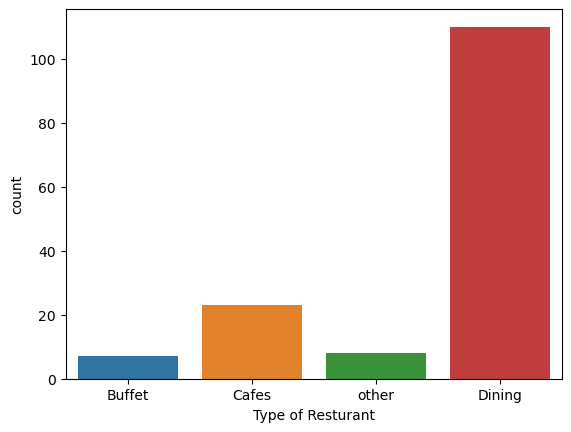

In [8]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel("Type of Resturant")
plt.show()

Text(0, 0.5, 'Votes')

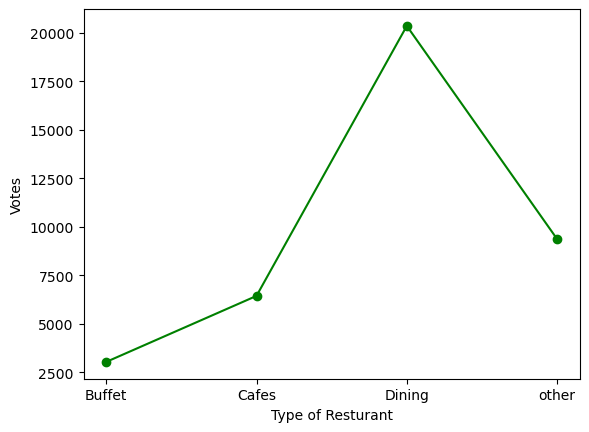

In [9]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, c = "green", marker = "o")
plt.xlabel("Type of Resturant")
plt.ylabel("Votes")

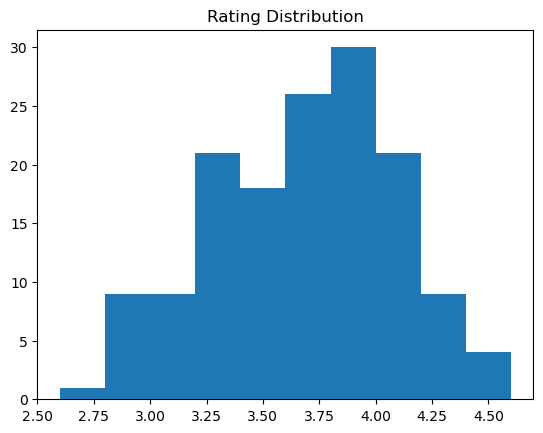

In [10]:
plt.hist(df['rate'], bins = 10)
plt.title("Rating Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

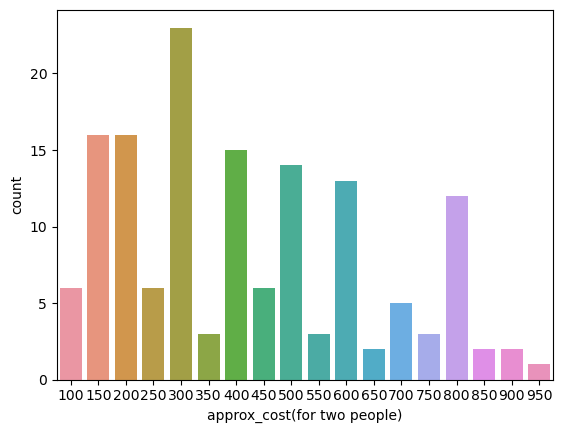

In [11]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x = couple_data)

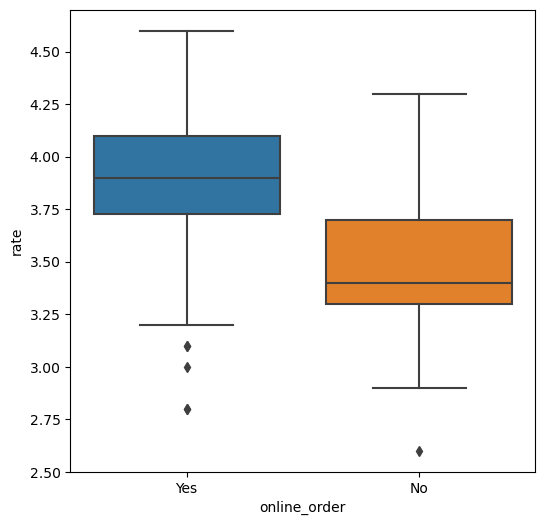

In [13]:
plt.figure(figsize = (6,6))
sns.boxplot( x = 'online_order' , y = 'rate', data = df )
plt.show()

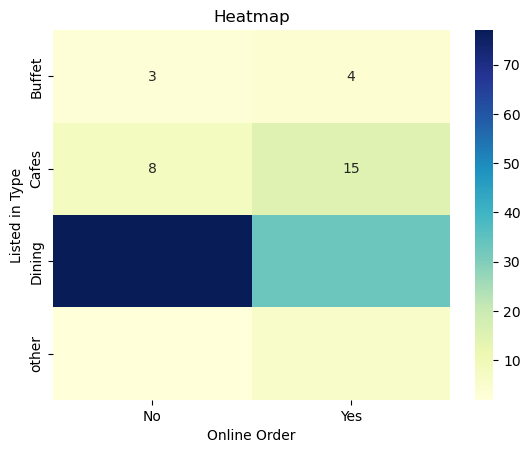

In [15]:
pivot_table =  df.pivot_table(index = 'listed_in(type)', columns= 'online_order',aggfunc ="size", fill_value = 0 )
sns.heatmap(pivot_table,annot = True , cmap= 'YlGnBu',fmt = 'd')
plt.title('Heatmap')
plt.xlabel("Online Order")
plt.ylabel("Listed in Type")
plt.show()